In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [3]:
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isna().sum()
print("Missing values in critical columns:")
print(missing_values)

Missing values in critical columns:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


In [4]:
df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)

# For 'JobSat' (numerical column), impute with the median (since it's numerical)
df['JobSat'].fillna(df['JobSat'].median(), inplace=True)

# Step 3: Verify that missing values are handled
missing_values_after = df[['Employment', 'JobSat', 'RemoteWork']].isna().sum()
print("\nMissing values after handling:")
print(missing_values_after)

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(df)


Missing values after handling:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64

Updated DataFrame:
       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

          

/tmp/ipykernel_2542/3322880394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)
/tmp/ipykernel_2542/3322880394.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [6]:
df = pd.DataFrame({'YearsCodePro': ['0-5', '5-10', '10-20','30']})
df

,YearsCodePro
0,0-5
1,5-10
2,10-20
3,30


/tmp/ipykernel_2542/451231194.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
/tmp/ipykernel_2542/451231194.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExperienceRange', y='JobSat', data=median_job_sat, palette='viridis')


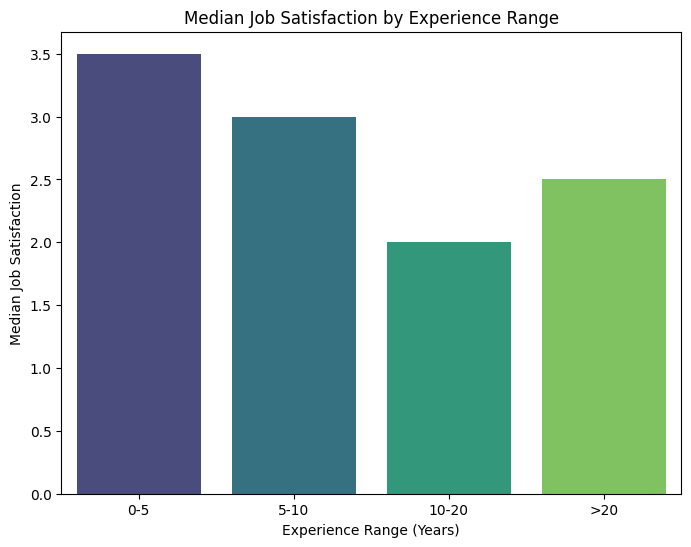

  ExperienceRange  JobSat
0             0-5     3.5
1            5-10     3.0
2           10-20     2.0
3             >20     2.5


In [37]:
df = pd.DataFrame({
    'YearsCodePro': [1, 3, 7, 12, 15, 22, 30, 5, 8, 18],  # Example years of professional coding experience
    'JobSat': [3, 4, 3, 2, 5, 4, 1, 4, 3, 2]  # Example job satisfaction scores
})

# Step 1: Create Experience Ranges
bins = [0, 5, 10, 20, float('inf')]  # Bins for 0-5, 5-10, 10-20, >20 years
labels = ['0-5', '5-10', '10-20', '>20']  # Labels for the corresponding bins

df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Step 2: Calculate the Median Job Satisfaction for Each Range
median_job_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()

# Step 3: Visualize the Results using a Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='ExperienceRange', y='JobSat', data=median_job_sat, palette='viridis')

# Customize the plot
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.show()

# Display the median job satisfaction values
print(median_job_sat)

/tmp/ipykernel_2542/3125806019.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, palette='viridis')


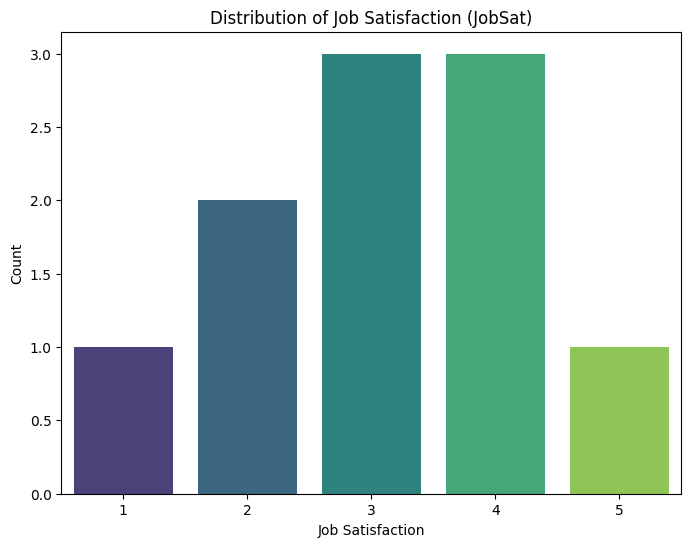

In [38]:
df = pd.DataFrame({
    'YearsCodePro': [1, 3, 7, 12, 15, 22, 30, 5, 8, 18],  # Example years of professional coding experience
    'JobSat': [3, 4, 3, 2, 5, 4, 1, 4, 3, 2]  # Example job satisfaction scores
})

# Step: Create a count plot to show the distribution of JobSat values
plt.figure(figsize=(8, 6))
sns.countplot(x='JobSat', data=df, palette='viridis')

# Customize the plot
plt.title('Distribution of Job Satisfaction (JobSat)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_2542/1374085212.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df, palette='viridis')


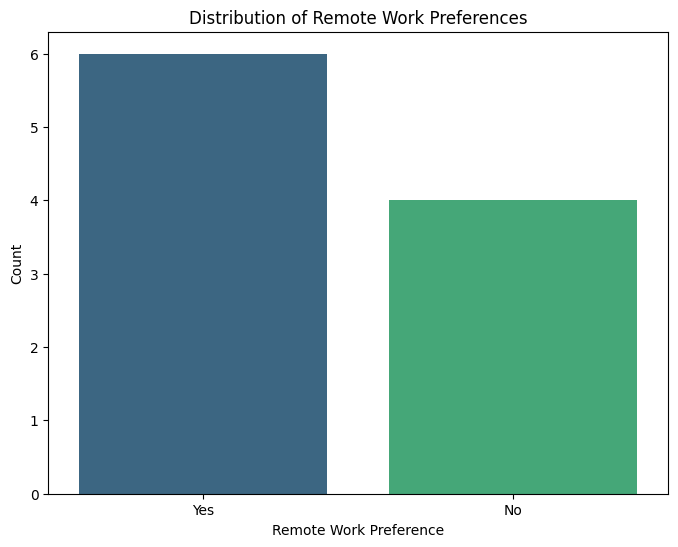

Cross-tabulation by Employment Type:
Employment  Full-time  Part-time  Total
RemoteWork                             
No                  2          2      4
Yes                 4          2      6
Total               6          4     10

Cross-tabulation by Job Role:
JobRole     Data Scientist  Developer  Manager  Total
RemoteWork                                           
No                       0          2        2      4
Yes                      3          2        1      6
Total                    3          4        3     10


In [39]:
df = pd.DataFrame({
    'RemoteWork': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No'],  # Remote work preference
    'Employment': ['Full-time', 'Full-time', 'Part-time', 'Part-time', 'Full-time', 'Full-time', 'Part-time', 'Full-time', 'Part-time', 'Full-time'],  # Employment type
    'JobRole': ['Developer', 'Developer', 'Data Scientist', 'Developer', 'Manager', 'Data Scientist', 'Manager', 'Developer', 'Data Scientist', 'Manager']  # Job role
})

# Step 1: Use a count plot to show the distribution of RemoteWork values
plt.figure(figsize=(8, 6))
sns.countplot(x='RemoteWork', data=df, palette='viridis')

# Customize the plot
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.show()

# Step 2: Cross-tabulate remote work preferences by employment type and job roles
cross_tab_employment = pd.crosstab(df['RemoteWork'], df['Employment'], margins=True, margins_name="Total")
cross_tab_jobrole = pd.crosstab(df['RemoteWork'], df['JobRole'], margins=True, margins_name="Total")

# Display the cross-tabulations
print("Cross-tabulation by Employment Type:")
print(cross_tab_employment)

print("\nCross-tabulation by Job Role:")
print(cross_tab_jobrole)

/tmp/ipykernel_2542/3857243830.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')


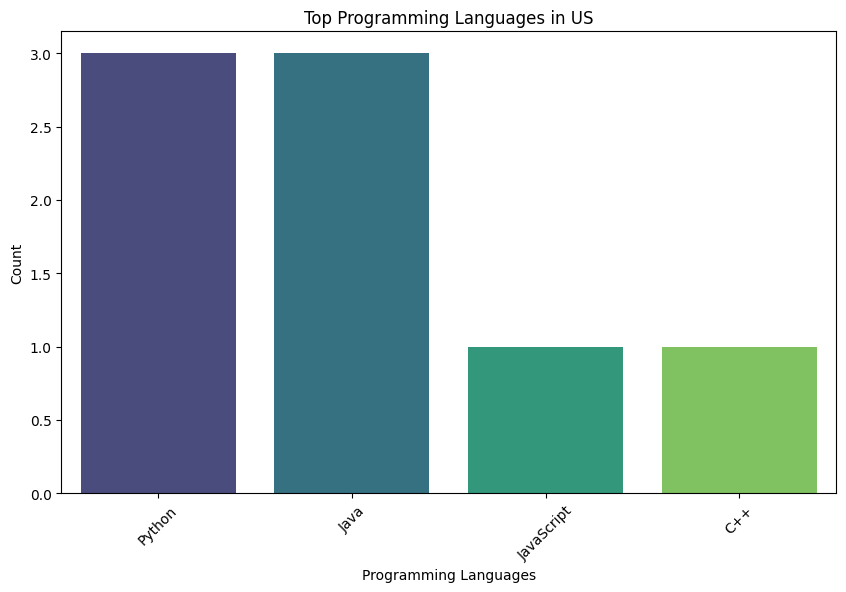

In [40]:
df = pd.DataFrame({
    'Country': ['US', 'US', 'US', 'India', 'India', 'Germany', 'Germany', 'US'],
    'LanguageHaveWorkedWith': ['Python,Java', 'Python,JavaScript', 'Java,C++,Python', 'Python,Java', 'JavaScript', 'C++,Python', 'Python,Java', 'Java']
})

# Step 1: Filter data by region (e.g., 'US', 'India', 'Germany')
country_filter = 'US'  # You can change this to any country or region
df_filtered = df[df['Country'] == country_filter]

# Step 2: Count the frequency of each language by region
# First, split the 'LanguageHaveWorkedWith' column by commas to get individual languages
languages_split = df_filtered['LanguageHaveWorkedWith'].str.split(',', expand=True).stack()

# Get the counts of each programming language
language_counts = languages_split.value_counts()

# Step 3: Visualize the top programming languages in the filtered region using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')

# Customize the plot
plt.title(f'Top Programming Languages in {country_filter}')
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

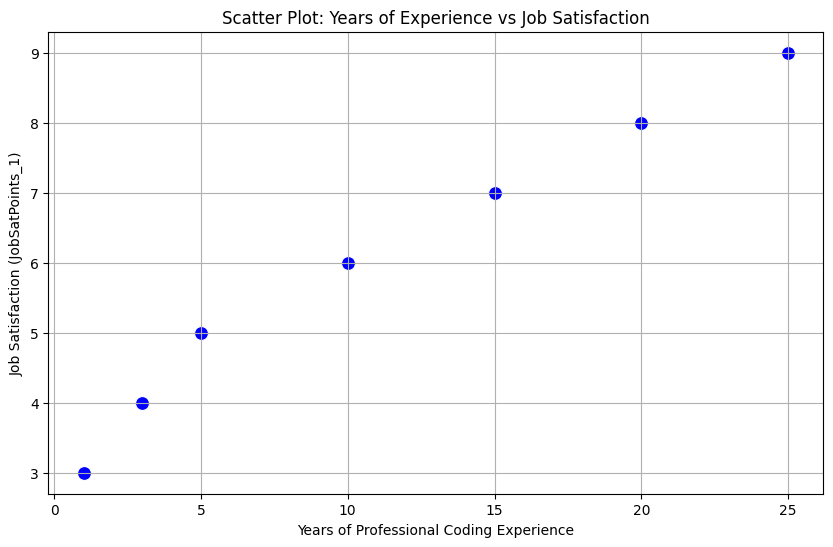

In [41]:
df = pd.DataFrame({
    'YearsCodePro': [1, 3, 5, 10, 15, 20, 25],
    'JobSatPoints_1': [3, 4, 5, 6, 7, 8, 9]
})

# Step 1: Create a scatter plot to visualize the relationship between YearsCodePro and JobSatPoints_1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df, color='blue', s=100, marker='o')

# Step 2: Customize the plot
plt.title('Scatter Plot: Years of Experience vs Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (JobSatPoints_1)')
plt.grid(True)
plt.show()


Employment  Contract  Full-time  Part-time  Total
EdLevel                                          
Bachelors          1          2          0      3
Masters            0          2          1      3
PhD                0          1          1      2
Total              1          5          2      8


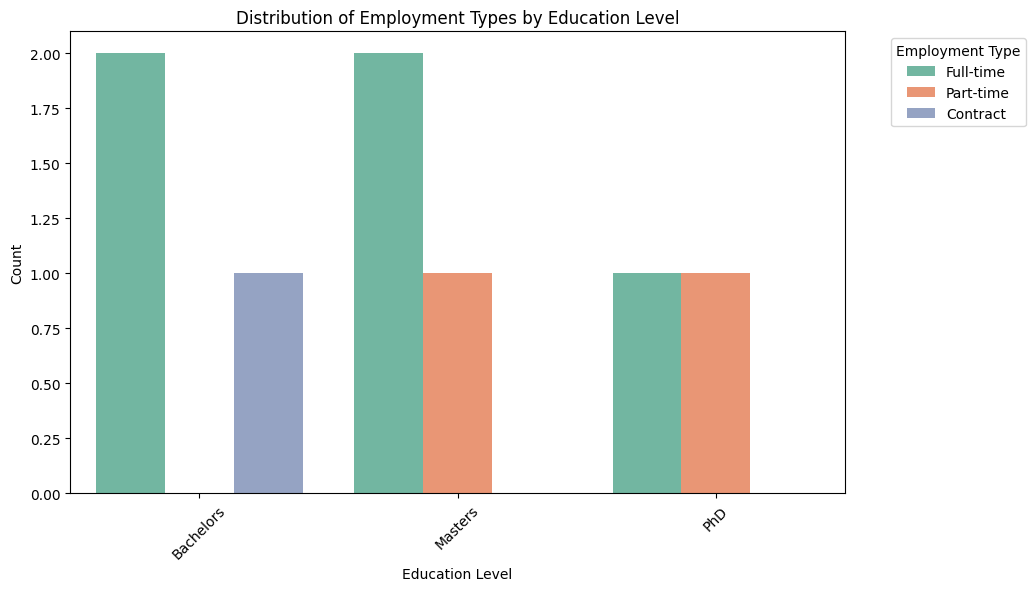

In [42]:
df = pd.DataFrame({
    'EdLevel': ['Bachelors', 'Masters', 'PhD', 'Bachelors', 'Masters', 'PhD', 'Bachelors', 'Masters'],
    'Employment': ['Full-time', 'Part-time', 'Full-time', 'Full-time', 'Full-time', 'Part-time', 'Contract', 'Full-time']
})

# Step 1: Cross-tabulation to analyze the relationship between EdLevel and Employment
cross_tab = pd.crosstab(df['EdLevel'], df['Employment'], margins=True, margins_name="Total")

# Display the cross-tabulation
print(cross_tab)

# Step 2: Visualize the relationship using a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='EdLevel', hue='Employment', data=df, palette='Set2')

# Customize the plot
plt.title('Distribution of Employment Types by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()